<a href="https://colab.research.google.com/github/Myavuzars/MachineLearning/blob/main/Churn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Machine Learning /Customer-Churn.csv")

df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [5]:
new_df = df.copy()

In [6]:
new_df.drop(['customerID'], axis=1, inplace=True)

In [7]:
#Dealing with missing values (in General)
row_has_NaN = new_df.isnull().any(axis=1)
rows_with_NaN = new_df[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


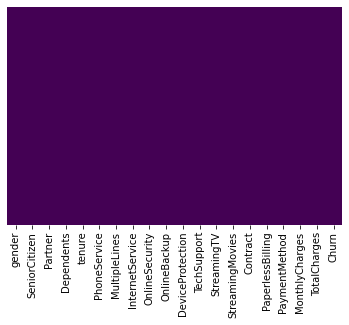

In [8]:
# Using heat map to check if there is any missing values
sns.heatmap(new_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

#No Missing data

In [9]:
#Replacing blank cells to zero value 
new_df['TotalCharges']=new_df['TotalCharges'].str.replace(' ','0').astype('float64')


In [10]:
new_df['SeniorCitizen']=new_df['SeniorCitizen'].astype('category')

In [11]:
new_df.dtypes

gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

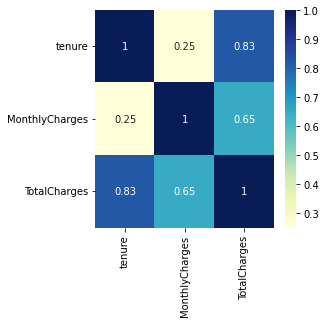

In [12]:
#Correlation Matrix
corrmat = new_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(4,4))
#plot heat map
g=sns.heatmap(new_df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [13]:
#Splitting data into Numerical and Categorical
catdf =new_df.iloc[:,:-3]
numdf= new_df.iloc[:,-3:-1]
y= new_df.iloc[:,-1]
numdf.head()

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.50
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65


In [14]:
#Converting data into Categorical
def convert_cat(df):
  for col in df.columns:
      df[col] = df[col].astype('category')

convert_cat(catdf)

In [15]:
#Number of Obs in each Class
from collections import Counter
Counter(y)

Counter({'No': 5174, 'Yes': 1869})

In [16]:
#Data Exploration


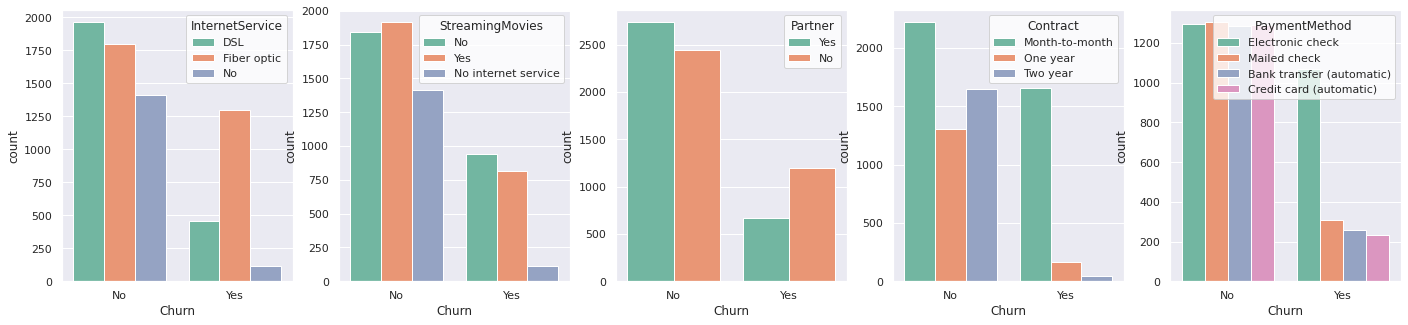

In [21]:
#Data Visualization for Predictor variables 
fig, axes = plt.subplots(1, 5)
sns.set_style('whitegrid')
sns.color_palette("Set2")
sns.countplot(x='Churn', hue="InternetService", data=new_df, palette="Set2", ax=axes[0])
sns.countplot(x='Churn', hue="StreamingMovies", data=new_df, palette="Set2", ax=axes[1])
sns.countplot(x='Churn', hue='Partner',         data=new_df, palette="Set2", ax=axes[2])
sns.countplot(x='Churn', hue='Contract',        data=new_df, palette="Set2", ax=axes[3])
sns.countplot(x='Churn', hue='PaymentMethod',   data=new_df, palette="Set2", ax=axes[4])
sns.set(rc={'figure.figsize':(24,5)})
plt.show()

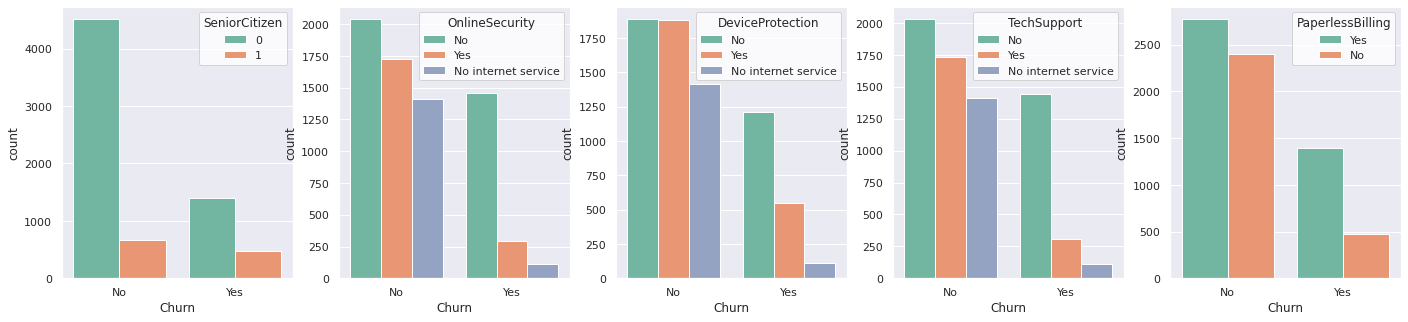

In [18]:
#Data Visualization for Predictor variables 
fig, axes = plt.subplots(1, 5)
sns.set_style('whitegrid')
sns.countplot(x='Churn', hue="SeniorCitizen", data=new_df, palette="Set2",ax=axes[0])
sns.countplot(x='Churn', hue='OnlineSecurity', data=new_df,palette="Set2", ax=axes[1])
sns.countplot(x='Churn', hue='DeviceProtection', data=new_df,palette="Set2", ax=axes[2])
sns.countplot(x='Churn', hue='TechSupport', data=new_df, palette="Set2",ax=axes[3])
sns.countplot(x='Churn', hue='PaperlessBilling', data=new_df,palette="Set2", ax=axes[4])
sns.set(rc={'figure.figsize':(24,5)})
plt.show()

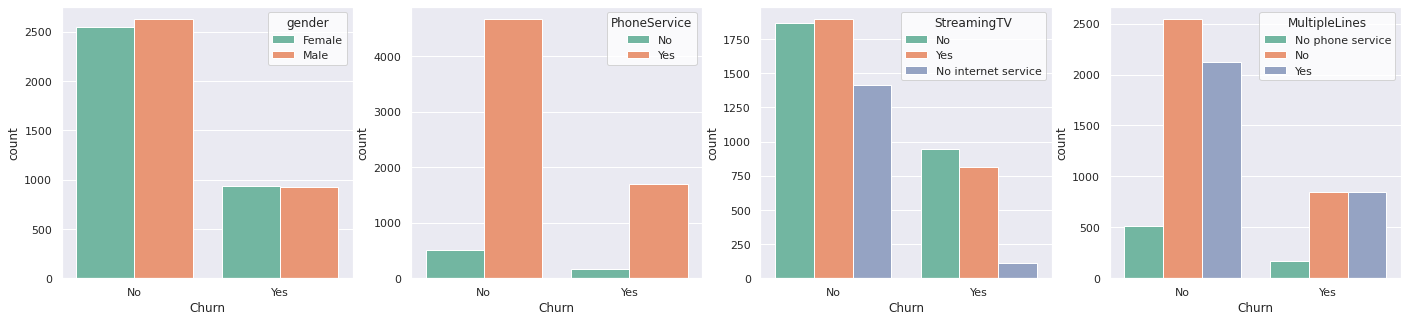

In [19]:
#Data Visualization for Predictor variables 
fig, axes = plt.subplots(1, 4)
sns.set_style('whitegrid')
sns.countplot(x='Churn', hue='gender', data=new_df,       palette="Set2", ax=axes[0])
sns.countplot(x='Churn', hue='PhoneService', data=new_df, palette="Set2", ax=axes[1])
sns.countplot(x='Churn', hue='StreamingTV', data=new_df,  palette="Set2", ax=axes[2])
sns.countplot(x='Churn', hue='MultipleLines', data=new_df,palette="Set2", ax=axes[3])
sns.set(rc={'figure.figsize':(16,5)})
plt.show()

In [22]:
#We can notice that PhoneService, gender, StreamingTV, MultipleLines have similar trend for Yes and No, so these predictor have no(or less) impact on Churn(response) variable.

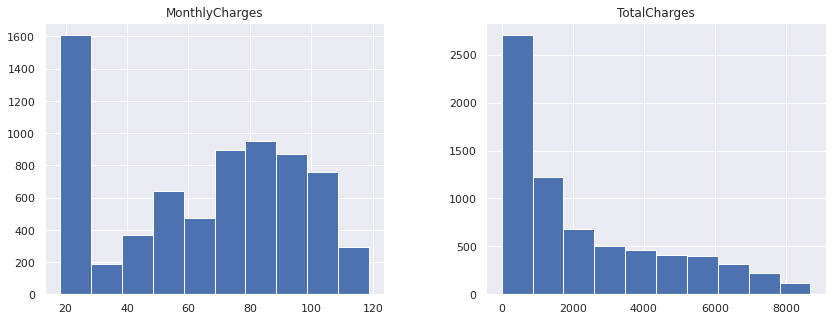

In [23]:
#Trend for Monthly and Total Charges
numerical_columns = numdf.select_dtypes(include=['float'])
numerical_columns.hist(figsize=(14,5))
plt.show()

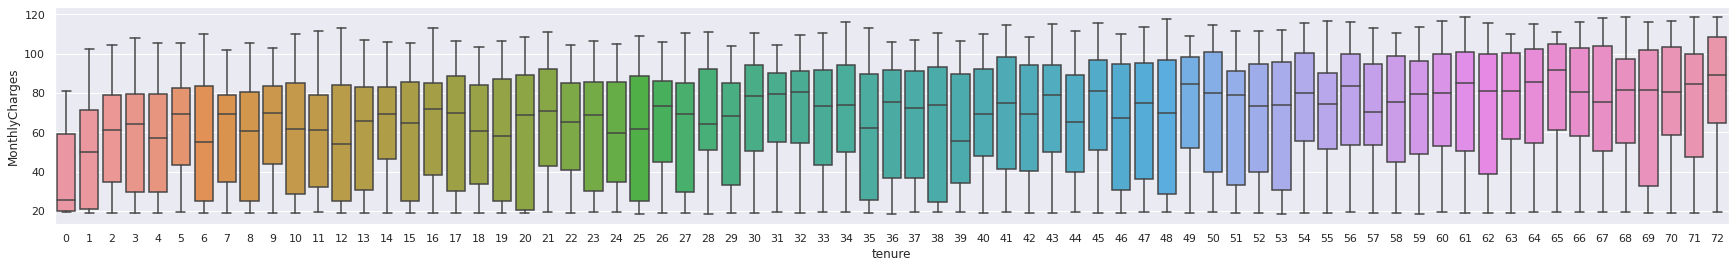

In [24]:
#Boxplot for Tenure
plt.figure(figsize=(30,4))
sns.boxplot(x='tenure',y='MonthlyCharges', data=new_df)
plt.show()
#it looks monthly charges increase as Tenure increases

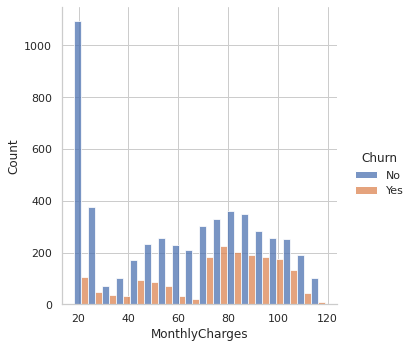

In [25]:
# Churn distribution when MonthlyCharges is given
sns.set_style('whitegrid')
sns.displot(new_df, x='MonthlyCharges',hue="Churn", multiple="dodge")
sns.set(rc={'figure.figsize':(10,6)})
plt.show()

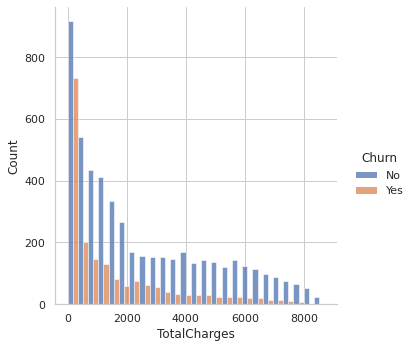

In [26]:
# Churn distribution when TotalCharges is given
sns.set_style('whitegrid')
sns.displot(new_df, x='TotalCharges',hue="Churn", multiple="dodge")
sns.set(rc={'figure.figsize':(10,6)})
plt.show()

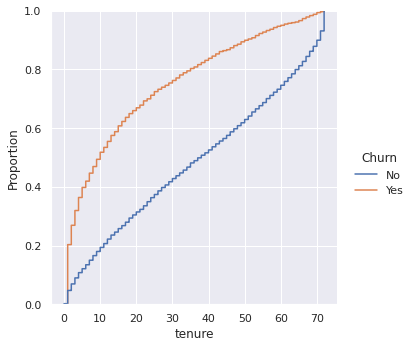

In [28]:
#Churn & Tenure Proportions
sns.displot(new_df, x="tenure", hue="Churn", kind="ecdf")
plt.show()
#Looks like when tenure gets increased, Churn rate gets decreases.

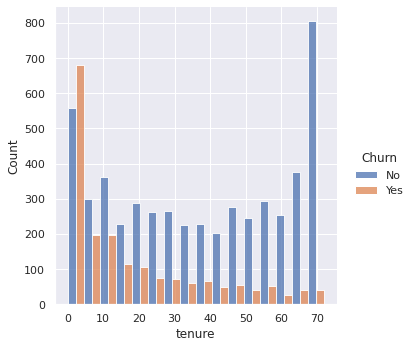

In [29]:
#and this is a better graph shows that as "tenure" increases, "Churn" ratio  decreases
sns.displot(new_df, x="tenure",hue="Churn", multiple="dodge")
plt.show()

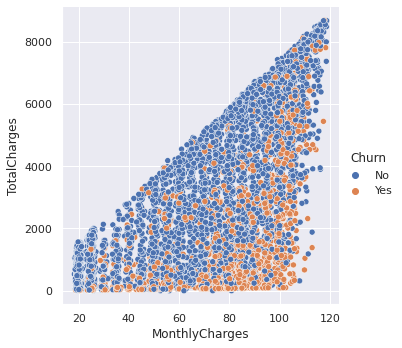

In [30]:
#This is very nice graph that shows how monthly charges effect Churn rate
sns.relplot(x="MonthlyCharges", y="TotalCharges", hue="Churn", data=new_df)
plt.show()

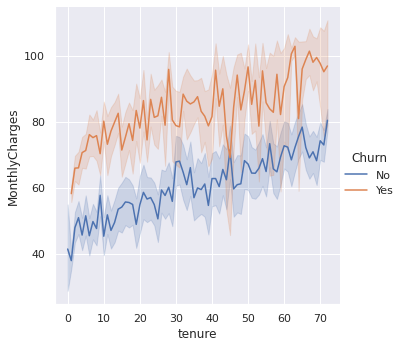

In [31]:
#This graph shows that "MonthlyCharges" has a huge influence on "Churn"
sns.relplot(x="tenure", y="MonthlyCharges", hue="Churn", kind="line", data=new_df)
plt.show()

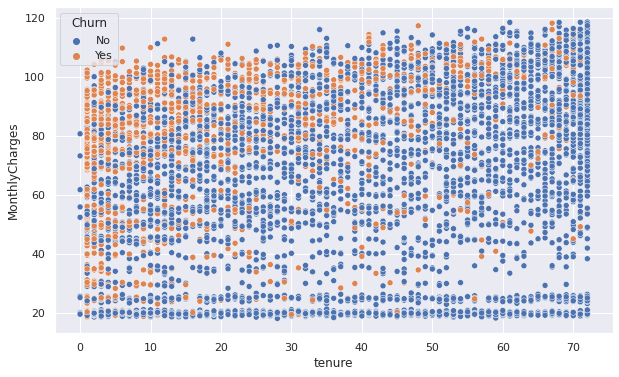

In [32]:
#Monthly charge & tenure distribution when churn is given
sns.scatterplot(data=new_df, x="tenure", y="MonthlyCharges", hue="Churn")
plt.show()

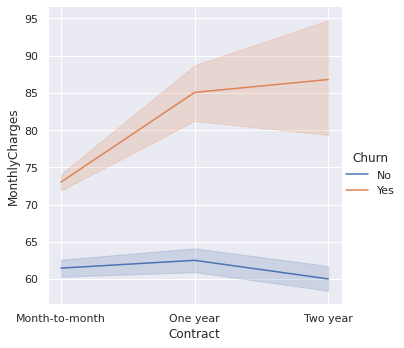

In [33]:
#This is another graph shows the influence on "Churn"
sns.relplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="line", data=new_df)

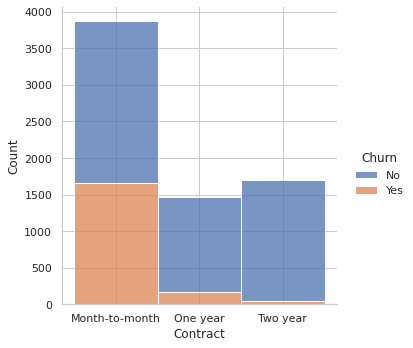

In [34]:
#Month to Month Contract has a negative influence on Churn rate
sns.set_style('whitegrid')
sns.displot(new_df, x='Contract',hue="Churn", multiple="stack")
sns.set(rc={'figure.figsize':(10,6)})
plt.show()

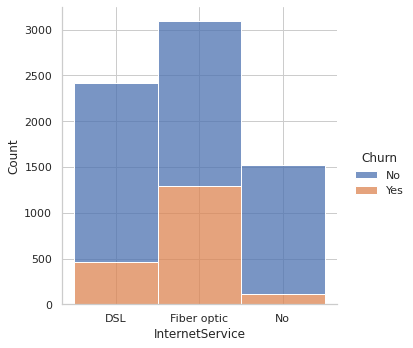

In [35]:
#Fiber optic has a higher Churn rate than DSL 
sns.set_style('whitegrid')
sns.displot(new_df, x='InternetService',hue="Churn", multiple="stack")
sns.set(rc={'figure.figsize':(10,6)})
plt.show()